<a href="https://colab.research.google.com/github/moncykurien/MalignantCommentsClassifier/blob/main/MalignantCommentsClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

References:
https://towardsdatascience.com/journey-to-the-center-of-multi-label-classification-384c40229bff

https://www.kaggle.com/surekharamireddy/malignant-comment-classification-starter-notebook

https://www.kaggle.com/rhodiumbeng/classifying-multi-label-comments-0-9741-lb

https://www.kaggle.com/jagangupta/stop-the-s-toxic-comments-eda

https://github.com/NikhilGohil/Social-Media-and-Data-Mining-Project

https://medium.com/@nupurbaghel/toxic-comment-classification-f6e075c3487a

https://github.com/nupurbaghel/Capstone_Project_ML

In [24]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_data = pd.read_csv('https://raw.githubusercontent.com/moncykurien/MalignantCommentsClassifier/main/data/train.csv')
test_data = pd.read_csv('https://raw.githubusercontent.com/moncykurien/MalignantCommentsClassifier/main/data/test.csv')


In [3]:
train_data.head()

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [4]:
test_data.head()

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.


In [5]:
print(f'In Train dataset, there are {train_data.shape[0]} rows and {train_data.shape[1]} columns.')
print(f'In Test dataset, there are {test_data.shape[0]} rows and {test_data.shape[1]} columns.')

In Train dataset, there are 159571 rows and 8 columns.
In Test dataset, there are 153164 rows and 2 columns.


In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                159571 non-null  object
 1   comment_text      159571 non-null  object
 2   malignant         159571 non-null  int64 
 3   highly_malignant  159571 non-null  int64 
 4   rude              159571 non-null  int64 
 5   threat            159571 non-null  int64 
 6   abuse             159571 non-null  int64 
 7   loathe            159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


In [7]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153164 entries, 0 to 153163
Data columns (total 2 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            153164 non-null  object
 1   comment_text  153164 non-null  object
dtypes: object(2)
memory usage: 2.3+ MB


In [8]:
train_data.describe()

,malignant,highly_malignant,rude,threat,abuse,loathe
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Observations:
1. The malignant, highly_malignant, rude, threat, abuse and loathe are all binary variables.
2. There are about 9.58% of malignant comments in the train data.
3. There are about 0.99% of highly malignant comments in the train data.
4. There are about 5.29% of rude comments in the train data.
5. There are about 0.3% of threat comments in the train data.
6. There are about 4.93% of abuse comments in the train data.
7. There are about 0.88% of loathe comments in the train data.

In [10]:
train_data.columns

Index(['id', 'comment_text', 'malignant', 'highly_malignant', 'rude', 'threat',
       'abuse', 'loathe'],
      dtype='object')

In [25]:
target_cols = ['malignant', 'highly_malignant', 'rude', 'threat',
       'abuse', 'loathe']

In [ ]:
"""
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
fig.suptitle('Initial Pokemon - 1st Generation')

# Bulbasaur
sns.barplot(ax=axes[0], x=bulbasaur.index, y=bulbasaur.values)
axes[0].set_title(bulbasaur.name)

# Charmander
sns.barplot(ax=axes[1], x=charmander.index, y=charmander.values)
axes[1].set_title(charmander.name)

# Squirtle
sns.barplot(ax=axes[2], x=squirtle.index, y=squirtle.values)
axes[2].set_title(squirtle.name)
"""

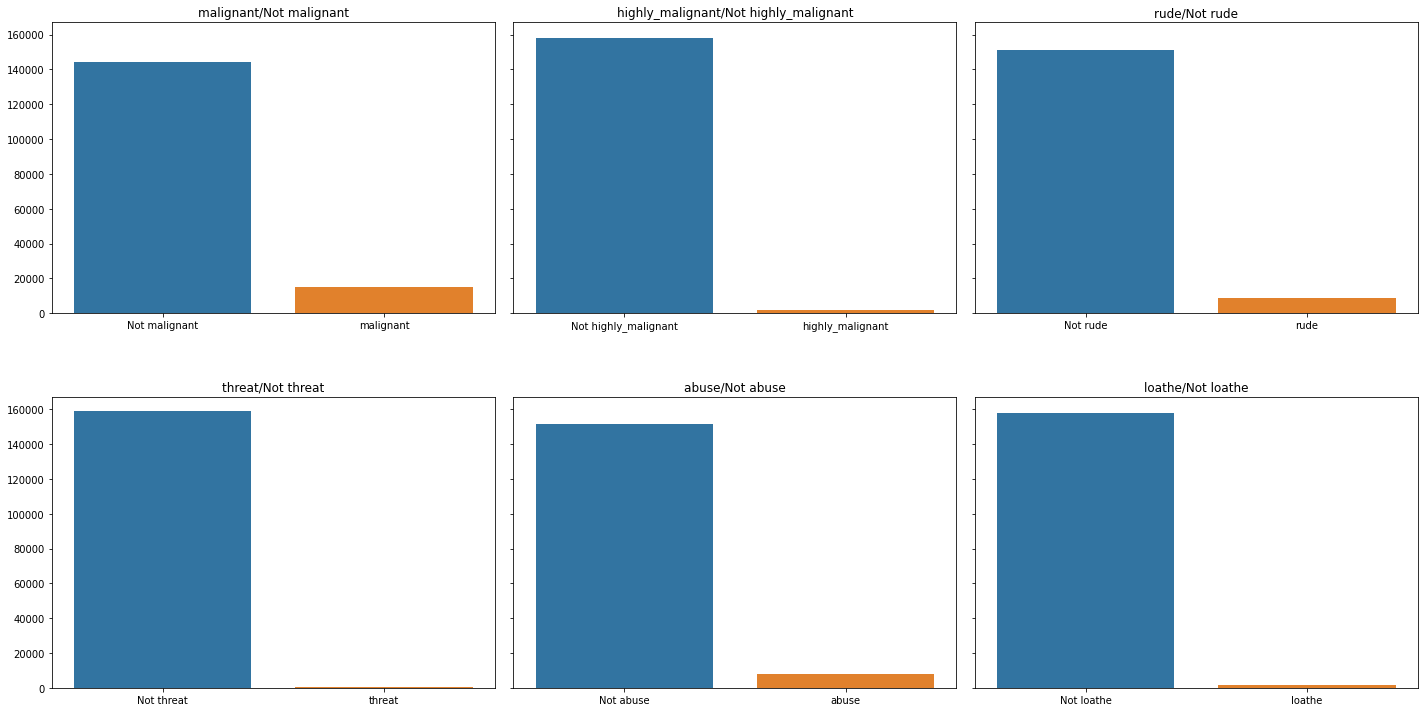

In [77]:
fig, axes = plt.subplots(2, 3, figsize=(20, 10), sharey=True)

i = -1
j = 0
for col in target_cols:
  plt.tight_layout(h_pad=5.0)
  
  if j % 3 == 0:
    i+=1
    j = 0
    sns.barplot(['Not '+col,col], train_data[col].value_counts().values, ax=axes[i,j])
  else:
    sns.barplot(['Not '+col,col], train_data[col].value_counts().values, ax=axes[i,j])
  axes[i,j].set_title(col+'/Not '+col)
  j += 1

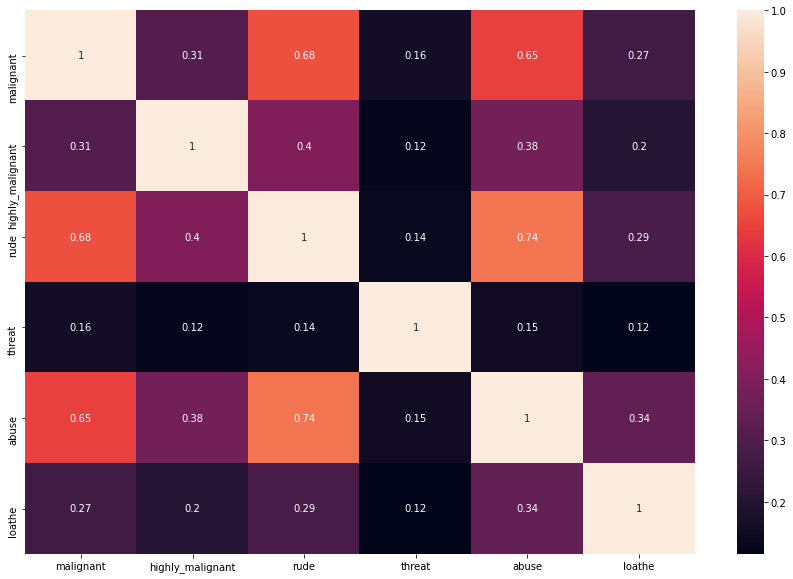

In [83]:
plt.figure(figsize=(15,10))
sns.heatmap(train_data.corr(),annot = True)